In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
salarios = pd.read_csv("Salary.csv")
salarios.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


**Pregunta a Resolver**: Determinar cual es el salario de un trabajador baso en el numero de años de experiencia

In [5]:
# Para buscar outliers
salarios.skew() # Nos dice que probablemente no hay outliers porque están cercanos a 0

YearsExperience    0.420163
Salary             0.209005
dtype: float64

<Axes: xlabel='Salary', ylabel='Count'>

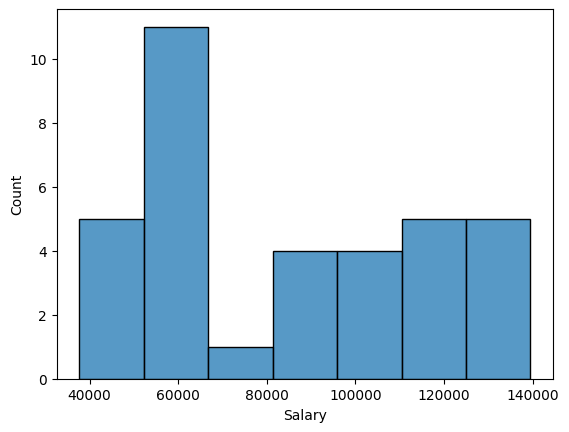

In [7]:
import seaborn as sns
sns.histplot(x=salarios["Salary"])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

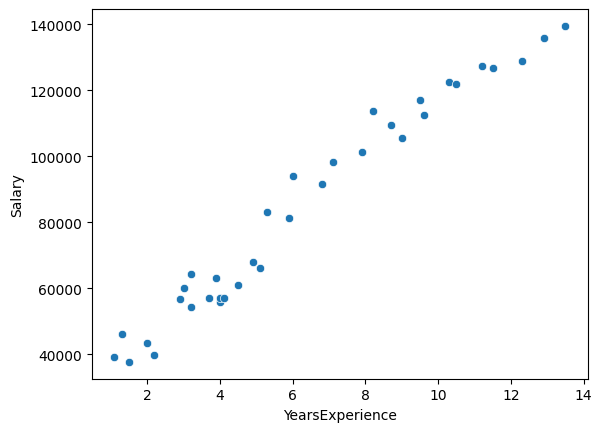

In [10]:
sns.scatterplot(x=salarios["YearsExperience"],y=salarios["Salary"])

In [11]:
model = LinearRegression()
X = salarios[["YearsExperience"]]
Y = salarios[["Salary"]]

In [13]:
lineal_reg = model.fit(X,Y)

In [14]:
lineal_reg.coef_ #B1

array([[8731.94104706]])

In [15]:
lineal_reg.intercept_ #B0

array([28859.52619453])

In [17]:
y_pred = lineal_reg.predict([[2]])
y_pred

c:\Users\juanq\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[46323.40828866]])

In [18]:
lineal_reg.score(X,Y) #R2

0.9651633106751443

In [21]:
import matplotlib.pyplot as plt

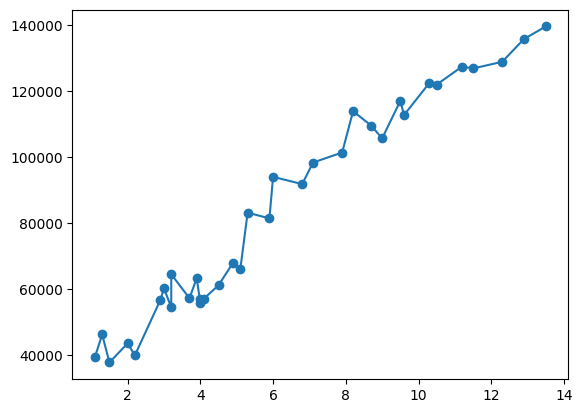

In [22]:
plt.scatter(X,Y)
plt.plot(X,Y)
plt.show()

# Regresión Lineal Multiple

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv("advertising.csv")
datos

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


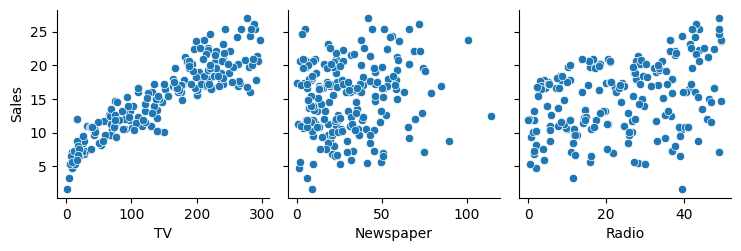

In [24]:
sns.pairplot(datos,x_vars=["TV","Newspaper","Radio"], y_vars="Sales")

<Axes: >

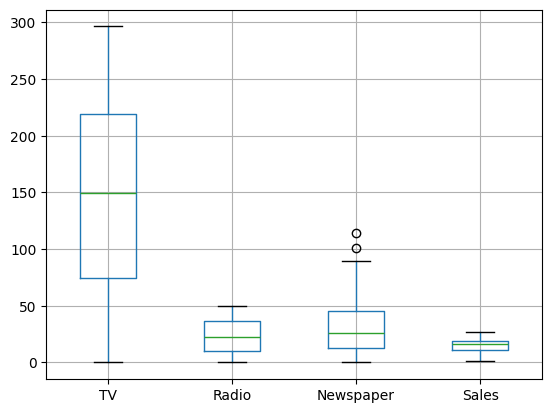

In [3]:
datos.boxplot()

In [4]:
datos.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [8]:
X = datos[["TV","Radio","Newspaper"]]
X = add_constant(X) #Añade el intercepto

VIF_data = pd.DataFrame()
VIF_data["Variable"] = X.columns
VIF_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF_data

,Variable,VIF
0,const,6.848900
1,TV,1.004611
2,Radio,1.144952
3,Newspaper,1.145187


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #Esto es instancear

In [11]:
X = datos[["TV","Radio","Newspaper"]]
Y = datos["Sales"]

In [12]:
model.fit(X,Y)

LinearRegression()

In [13]:
model.intercept_

4.625124078808653

In [14]:
model.coef_   # Y = 4.625 + 0.054 TV + 0.107 Radio + 0.0003 Newspaper, el que mas influye es Radio, conviene invertir ahí

array([0.05444578, 0.10700123, 0.00033566])

In [17]:
# Para realizar predicciones con regresión multivariada
sales_pred = model.predict(X)
plt.scatter(datos["Sales"],sales_pred)

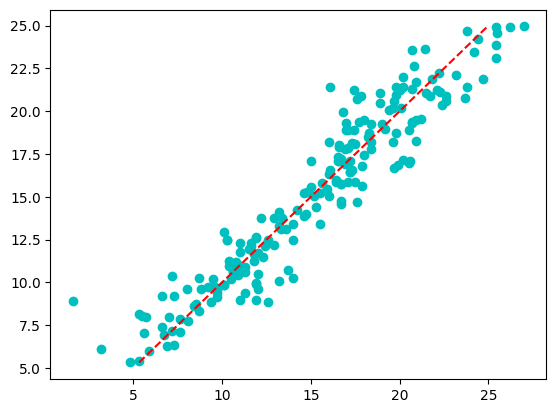

In [24]:
plt.scatter(datos["Sales"],sales_pred, color = "c")
plt.plot([sales_pred.min(), sales_pred.max()],[sales_pred.min(), sales_pred.max()], "--r")
plt.show()

In [25]:
model.score(X,Y) #R2

0.9025912899684558

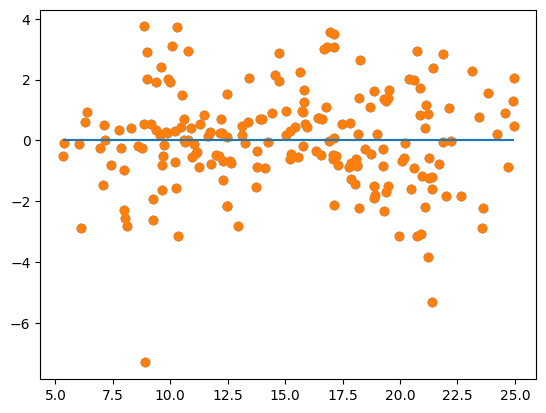

In [27]:
residuos = Y-sales_pred
plt.scatter(sales_pred, residuos)
plt.hlines(y=0, xmin=sales_pred.min(), xmax=sales_pred.max())
plt.show()


In [28]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [31]:
X_2 = datos[["TV","Radio","Newspaper"]]
X_2 = add_constant(X_2)

Y_2 = datos["Sales"]

In [35]:
model_2 = sm.OLS(Y_2,X_2).fit()
model_2.params

const        4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [34]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           8.13e-99
Time:                        18:39:08   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regresion con PCR

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
datos = pd.read_csv("advertising.csv")
datos.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [42]:
modelo = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("regresion", LinearRegression())
])

In [43]:
X = datos[["TV","Radio","Newspaper"]]
Y = datos["Sales"]

In [44]:
modelo.fit(X,Y)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('regresion', LinearRegression())])

In [45]:
modelo.predict(X)

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

In [49]:
regresor = modelo.named_steps["regresion"]

In [52]:
regresor.intercept_

15.130500000000001

In [51]:
regresor.coef_

array([ 2.06992121,  4.32260897, -1.13244033])

In [53]:
pca = modelo.named_steps["pca"]
pca.components_

array([[ 0.20787391,  0.69139674,  0.69192412],
       [ 0.97814838, -0.14965532, -0.14432267],
       [-0.0037659 , -0.70680537,  0.70739804]])

In [54]:
from sklearn.metrics import r2_score

score = r2_score(Y, modelo.predict(X))

In [59]:
modelo.predict(X)

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

In [55]:
score

0.9025912899684558

# Modelos no lineales

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
datos = pd.read_csv("ExpansiónCobre.csv")
datos.head()

,Expansión,Kelvin
0,0.591,24.41
1,1.547,34.82
2,2.902,44.09
3,2.894,45.07
4,4.703,54.98


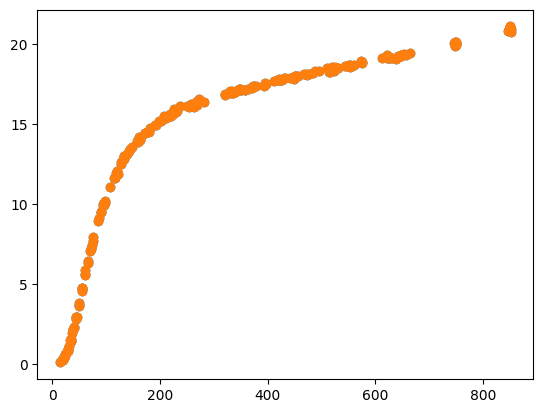

In [64]:
plt.scatter(datos["Kelvin"], datos["Expansión"])
plt.show() 
#Se parece a una función logística

In [65]:
def logistica(t,a,m,n,tau):
    return a*(1+m*np.exp(-t/tau))/(1+n*np.exp(-t/tau))

In [66]:
X = datos["Kelvin"].values
Y = datos["Expansión"].values

In [67]:
from scipy.optimize import curve_fit

In [68]:
params, params_cov = curve_fit(logistica,X,Y)

In [72]:
y_pred = logistica(X, *params)

In [73]:
from sklearn.metrics import r2_score, mean_squared_error

In [74]:
r2_score(Y,y_pred)

0.99063558971591

In [75]:
mean_squared_error(Y,y_pred)

0.31030597650910163

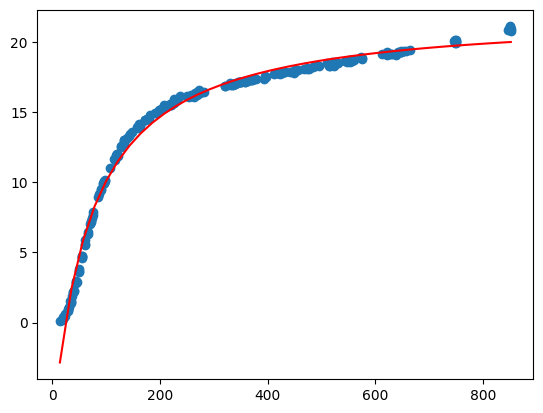

In [86]:
kelvin = np.linspace(X.min(),X.max(),40)
plt.scatter(X,Y)
plt.plot(kelvin, logistica(kelvin,*params), color = "r")
plt.show()


# División Dataset

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv("ExpansiónCobre.csv")

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [92]:
X_train.shape

(188,)

In [94]:
def polinomio(x,a,b,c,d,e,f):
    return a + b * x + c * x**2 + d * x**3 + e * x**4 + f * x**5

In [95]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

params, params_cov = curve_fit(polinomio, X_train, Y_train)

y_pred_train = polinomio(X_train, *params)
y_pred_test = polinomio(X_test, *params)


In [96]:
mean_squared_error(Y_train,y_pred_train)

0.060030560535267126

In [97]:
mean_squared_error(Y_test,y_pred_test)

0.15445304775017507